In [168]:
import os
import numpy as np 
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hc
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans as km

In [169]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [170]:
#QUESTION 1
#read in the data
os.chdir('/Users/prachidalal/Downloads')
tr = pd.read_csv('transactions.csv')
tr.head()
tr

,Transaction,Product
0,12359,Candy Bar
1,12362,Pain Reliever
2,12362,Pain Reliever
3,12365,Toothpaste
4,12371,Bow
...,...,...
459253,1221863,Candy Bar
459254,1221863,Greeting Cards
459255,1221863,Toothpaste
459256,1221863,Toothpaste


In [171]:
#grouping the transactions
trf = tr.groupby('Transaction')['Product'].apply(','.join)
trf

Transaction
12359                                              Candy Bar
12362                            Pain Reliever,Pain Reliever
12365                                             Toothpaste
12371                                                    Bow
12380                                         Greeting Cards
                                 ...                        
1221845    Photo Processing,Magazine,Magazine,Magazine,Gr...
1221854                                           Toothpaste
1221857                                  Candy Bar,Candy Bar
1221863       Candy Bar,Greeting Cards,Toothpaste,Toothpaste
1221866                                     Photo Processing
Name: Product, Length: 200000, dtype: object

In [172]:
#exporting grouped transactions to excel 
trf.to_csv('/Users/prachidalal/Downloads/trf.csv')

In [173]:
#read in the boolean data
os.chdir('/Users/prachidalal/Downloads')
trdf = pd.read_csv('trdf.csv')
trdf.head()
trdf

,Transaction,Product,Bar Soap,Bows,Candy Bar,Deodorant,Greeting Cards,Magazines,Markers,Pain Relievers,Pencils,Pens,Perfume,Photo Processing,Prescription,Shampoo,Toothbrushes,Toothpaste,Wrapping Paper
0,12359,Candy Bar,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,12362,"Pain Reliever,Pain Reliever",False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,12365,Toothpaste,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,12371,Bow,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,12380,Greeting Cards,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1221845,"Photo Processing,Magazine,Magazine,Magazine,Gr...",False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False
199996,1221854,Toothpaste,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
199997,1221857,"Candy Bar,Candy Bar",False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199998,1221863,"Candy Bar,Greeting Cards,Toothpaste,Toothpaste",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [174]:
#drop product list from data
trdf1 = trdf.copy()
trdf1 = trdf1.drop(['Product'], axis = 1)
trdf1

,Transaction,Bar Soap,Bows,Candy Bar,Deodorant,Greeting Cards,Magazines,Markers,Pain Relievers,Pencils,Pens,Perfume,Photo Processing,Prescription,Shampoo,Toothbrushes,Toothpaste,Wrapping Paper
0,12359,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,12362,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,12365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,12371,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,12380,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1221845,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False
199996,1221854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
199997,1221857,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199998,1221863,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [175]:
#making transactions the index and making variables boolean 
trdf1.set_index('Transaction', inplace = True)
trdf1 = trdf1.astype(bool)
trdf1

,Bar Soap,Bows,Candy Bar,Deodorant,Greeting Cards,Magazines,Markers,Pain Relievers,Pencils,Pens,Perfume,Photo Processing,Prescription,Shampoo,Toothbrushes,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
12359,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12362,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
12365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
12371,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12380,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221845,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False
1221854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1221857,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [176]:
#QUESTION 2
#frequent itemsets using a minimum support threshold of 1%
fi = apriori(trdf1, min_support = 0.01, use_colnames = True)
fi

,support,itemsets
0,0.043025,(Bar Soap)
1,0.054645,(Bows)
2,0.171005,(Candy Bar)
3,0.146885,(Greeting Cards)
4,0.241305,(Magazines)
5,0.026700,(Pain Relievers)
6,0.134925,(Pencils)
7,0.143575,(Pens)
8,0.089960,(Perfume)
9,0.058480,(Photo Processing)


In [177]:
#QUESTION 3
#all association rules with a minimum confidence of 10%
rules = association_rules(fi, metric="confidence", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bows),(Toothbrushes),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
1,(Toothbrushes),(Bows),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
2,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604
3,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626
4,(Candy Bar),(Magazines),0.171005,0.241305,0.040535,0.237040,0.982325,-0.000729,0.994410
5,(Magazines),(Candy Bar),0.241305,0.171005,0.040535,0.167982,0.982325,-0.000729,0.996367
6,(Candy Bar),(Pencils),0.171005,0.134925,0.033015,0.193065,1.430903,0.009942,1.072050
7,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338


In [178]:
#sorting all association rules with a minimum confidence of 10%
rules1 = rules.sort_values(['confidence', 'lift'], ascending = [False, False])
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
30,"(Greeting Cards, Magazines)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
39,"(Toothpaste, Magazines)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810
29,"(Candy Bar, Magazines)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
33,"(Toothpaste, Greeting Cards)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726
28,"(Candy Bar, Greeting Cards)",(Magazines),0.043660,0.241305,0.016665,0.381699,1.581813,0.006130,1.227065
37,"(Pencils, Magazines)",(Candy Bar),0.031630,0.171005,0.012005,0.379545,2.219495,0.006596,1.336108
48,"(Toothpaste, Magazines)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873
44,"(Pencils, Greeting Cards)",(Magazines),0.029240,0.241305,0.010955,0.374658,1.552633,0.003899,1.213248
47,"(Toothpaste, Greeting Cards)",(Magazines),0.032080,0.241305,0.011945,0.372350,1.543069,0.004204,1.208787


In [13]:
#sorting all association rules with a minimum confidence of 10%, lift first
rules2 = rules.sort_values(['lift', 'confidence'], ascending =[False, False])
rules2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Perfume),(Toothbrushes),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
26,(Toothbrushes),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172
0,(Bows),(Toothbrushes),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
1,(Toothbrushes),(Bows),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
29,"(Candy Bar, Magazines)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
31,(Greeting Cards),"(Candy Bar, Magazines)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
30,"(Greeting Cards, Magazines)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
48,"(Toothpaste, Magazines)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873
39,"(Toothpaste, Magazines)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810


In [148]:
#QUESTION 4
#QUESTION 6
#sorting values based on lift
rules3 = rules.sort_values(['lift'], ascending =[False])
rules3.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen,conlen
27,(Perfume),(Toothbrushes),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306,1,1
26,(Toothbrushes),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172,1,1
1,(Toothbrushes),(Bows),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755,1,1
0,(Bows),(Toothbrushes),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877,1,1
31,(Greeting Cards),"(Candy Bar, Magazines)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253,1,2


In [147]:
#QUESTION 6
#sorting values based on confidence
rules3 = rules.sort_values(['confidence'], ascending =[False])
rules3.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen,conlen
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,2,1
30,"(Greeting Cards, Magazines)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,2,1
39,"(Toothpaste, Magazines)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,2,1
29,"(Candy Bar, Magazines)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,2,1
33,"(Toothpaste, Greeting Cards)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726,2,1


In [16]:
#QUESTION 5
#QUESTION 6
#sorting values based on leverage
rules3 = rules.sort_values(['leverage'], ascending =[False])
rules3.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604
3,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626
27,(Perfume),(Toothbrushes),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
26,(Toothbrushes),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338
29,"(Candy Bar, Magazines)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
31,(Greeting Cards),"(Candy Bar, Magazines)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253
30,"(Greeting Cards, Magazines)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
6,(Candy Bar),(Pencils),0.171005,0.134925,0.033015,0.193065,1.430903,0.009942,1.072050


In [149]:
#QUESTION 5
#QUESTION 6
#sorting values based on conviction 
rules3 = rules.sort_values(['conviction'], ascending =[False])
rules3.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen,conlen
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,2,1
30,"(Greeting Cards, Magazines)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,2,1
39,"(Toothpaste, Magazines)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,2,1
29,"(Candy Bar, Magazines)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,2,1
33,"(Toothpaste, Greeting Cards)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726,2,1


In [18]:
#antecendents and consequents 
rules["antlen"] = rules["antecedents"].apply(lambda x: len(x))
rules["conlen"] = rules["consequents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen,conlen
0,(Bows),(Toothbrushes),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877,1,1
1,(Toothbrushes),(Bows),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755,1,1
2,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604,1,1
3,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626,1,1
4,(Candy Bar),(Magazines),0.171005,0.241305,0.040535,0.237040,0.982325,-0.000729,0.994410,1,1
5,(Magazines),(Candy Bar),0.241305,0.171005,0.040535,0.167982,0.982325,-0.000729,0.996367,1,1
6,(Candy Bar),(Pencils),0.171005,0.134925,0.033015,0.193065,1.430903,0.009942,1.072050,1,1
7,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558,1,1
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087,1,1
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338,1,1


In [19]:
rules3 = rules[ (rules['conlen'] == 1) &
       (rules['confidence'] >= 0.2) &
       (rules['lift'] > 1.2) ]
rules3 = rules3.sort_values(['lift', 'confidence'], ascending =[False, False])
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen,conlen
27,(Perfume),(Toothbrushes),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306,1,1
26,(Toothbrushes),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172,1,1
0,(Bows),(Toothbrushes),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877,1,1
29,"(Candy Bar, Magazines)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,2,1
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,2,1
30,"(Greeting Cards, Magazines)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,2,1
48,"(Toothpaste, Magazines)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873,2,1
39,"(Toothpaste, Magazines)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,2,1
33,"(Toothpaste, Greeting Cards)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726,2,1
45,"(Pencils, Magazines)",(Greeting Cards),0.031630,0.146885,0.010955,0.346348,2.357956,0.006309,1.305152,2,1


In [184]:
#PART 2: QUESTION 1, read in the data
os.chdir('/Users/prachidalal/Downloads')
bc = pd.read_csv('bankcustomers.csv')
bc.head()
bc

,Unnamed: 0,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,0,ID12101,48,1,1,17546.00,0,1,0,0,0,0,1
1,1,ID12102,40,0,2,30085.10,1,3,1,0,1,1,0
2,2,ID12103,51,1,1,16575.40,1,0,1,1,1,0,0
3,3,ID12104,23,1,2,20375.40,1,3,0,0,1,0,0
4,4,ID12105,57,1,3,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,ID12696,61,1,1,47025.00,0,2,1,1,1,1,0
596,596,ID12697,30,1,1,9672.25,1,0,1,1,1,0,0
597,597,ID12698,31,1,2,15976.30,1,0,1,1,0,0,1
598,598,ID12699,29,0,1,14711.80,1,0,0,1,0,1,0


In [185]:
#create an instance of the class
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [186]:
#convert into array
ohe.fit_transform(bc[['region']]).toarray()
feature_arry = ohe.fit_transform(bc[['region']]).toarray()

In [187]:
#show categories
ohe.categories_

[array([1, 2, 3, 4])]

In [188]:
feature_labels = ohe.categories_

In [189]:
#convert into dataframe
f = pd.DataFrame(feature_arry, columns = ['inner city','town','rural','suburban'])
f

,inner city,town,rural,suburban
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
595,1.0,0.0,0.0,0.0
596,1.0,0.0,0.0,0.0
597,0.0,1.0,0.0,0.0
598,1.0,0.0,0.0,0.0


In [190]:
#merge dataframe with original data
bcf = pd.merge(f,bc,left_index = True, right_index = True)
print(bcf)

     inner city  town  rural  suburban  Unnamed: 0       id  age  sex  region  \
0           1.0   0.0    0.0       0.0           0  ID12101   48    1       1   
1           0.0   1.0    0.0       0.0           1  ID12102   40    0       2   
2           1.0   0.0    0.0       0.0           2  ID12103   51    1       1   
3           0.0   1.0    0.0       0.0           3  ID12104   23    1       2   
4           0.0   0.0    1.0       0.0           4  ID12105   57    1       3   
..          ...   ...    ...       ...         ...      ...  ...  ...     ...   
595         1.0   0.0    0.0       0.0         595  ID12696   61    1       1   
596         1.0   0.0    0.0       0.0         596  ID12697   30    1       1   
597         0.0   1.0    0.0       0.0         597  ID12698   31    1       2   
598         1.0   0.0    0.0       0.0         598  ID12699   29    0       1   
599         0.0   1.0    0.0       0.0         599  ID12700   38    0       2   

       income  married  chi

In [191]:
#drop region and previous index
bcf2 = bcf.copy()
bcf2 = bcf2.drop(['region','Unnamed: 0'], axis = 1)
bcf2

,inner city,town,rural,suburban,id,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,1.0,0.0,0.0,0.0,ID12101,48,1,17546.00,0,1,0,0,0,0,1
1,0.0,1.0,0.0,0.0,ID12102,40,0,30085.10,1,3,1,0,1,1,0
2,1.0,0.0,0.0,0.0,ID12103,51,1,16575.40,1,0,1,1,1,0,0
3,0.0,1.0,0.0,0.0,ID12104,23,1,20375.40,1,3,0,0,1,0,0
4,0.0,0.0,1.0,0.0,ID12105,57,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.0,0.0,0.0,0.0,ID12696,61,1,47025.00,0,2,1,1,1,1,0
596,1.0,0.0,0.0,0.0,ID12697,30,1,9672.25,1,0,1,1,1,0,0
597,0.0,1.0,0.0,0.0,ID12698,31,1,15976.30,1,0,1,1,0,0,1
598,1.0,0.0,0.0,0.0,ID12699,29,0,14711.80,1,0,0,1,0,1,0


In [192]:
#find missing values
bcf2.isna().sum()

inner city    0
town          0
rural         0
suburban      0
id            0
age           0
sex           0
income        0
married       0
children      0
car           0
savings       0
checking      0
mortgage      0
pep           0
dtype: int64

In [193]:
#drop ID in order to normalize numeric data
bcf3 = bcf2.copy()
bcf3 = bcf3.drop(['id'], axis = 1)
bcf3

,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,1.0,0.0,0.0,0.0,48,1,17546.00,0,1,0,0,0,0,1
1,0.0,1.0,0.0,0.0,40,0,30085.10,1,3,1,0,1,1,0
2,1.0,0.0,0.0,0.0,51,1,16575.40,1,0,1,1,1,0,0
3,0.0,1.0,0.0,0.0,23,1,20375.40,1,3,0,0,1,0,0
4,0.0,0.0,1.0,0.0,57,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.0,0.0,0.0,0.0,61,1,47025.00,0,2,1,1,1,1,0
596,1.0,0.0,0.0,0.0,30,1,9672.25,1,0,1,1,1,0,0
597,0.0,1.0,0.0,0.0,31,1,15976.30,1,0,1,1,0,0,1
598,1.0,0.0,0.0,0.0,29,0,14711.80,1,0,0,1,0,1,0


In [194]:
#normalize data
nbc = normalize(bcf3)
nbc = pd.DataFrame(nbc, columns=bcf3.columns)
nbc

,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,0.000057,0.000000,0.00000,0.0,0.002736,0.000057,0.999996,0.000000,0.000057,0.000000,0.000000,0.000000,0.000000,0.000057
1,0.000000,0.000033,0.00000,0.0,0.001330,0.000000,0.999999,0.000033,0.000100,0.000033,0.000000,0.000033,0.000033,0.000000
2,0.000060,0.000000,0.00000,0.0,0.003077,0.000060,0.999995,0.000060,0.000000,0.000060,0.000060,0.000060,0.000000,0.000000
3,0.000000,0.000049,0.00000,0.0,0.001129,0.000049,0.999999,0.000049,0.000147,0.000000,0.000000,0.000049,0.000000,0.000000
4,0.000000,0.000000,0.00002,0.0,0.001127,0.000020,0.999999,0.000020,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000021,0.000000,0.00000,0.0,0.001297,0.000021,0.999999,0.000000,0.000043,0.000021,0.000021,0.000021,0.000021,0.000000
596,0.000103,0.000000,0.00000,0.0,0.003102,0.000103,0.999995,0.000103,0.000000,0.000103,0.000103,0.000103,0.000000,0.000000
597,0.000000,0.000063,0.00000,0.0,0.001940,0.000063,0.999998,0.000063,0.000000,0.000063,0.000063,0.000000,0.000000,0.000063
598,0.000068,0.000000,0.00000,0.0,0.001971,0.000000,0.999998,0.000068,0.000000,0.000000,0.000068,0.000000,0.000068,0.000000


In [195]:
#QUESTION #2 CENTROID
#create first hierarchical cluster with centroid method
clstr1 = hc.linkage(nbc, method='centroid', metric="euclidean")

In [196]:
clstr1[0]

array([1.15000000e+02, 1.27000000e+02, 6.50256463e-06, 2.00000000e+00])

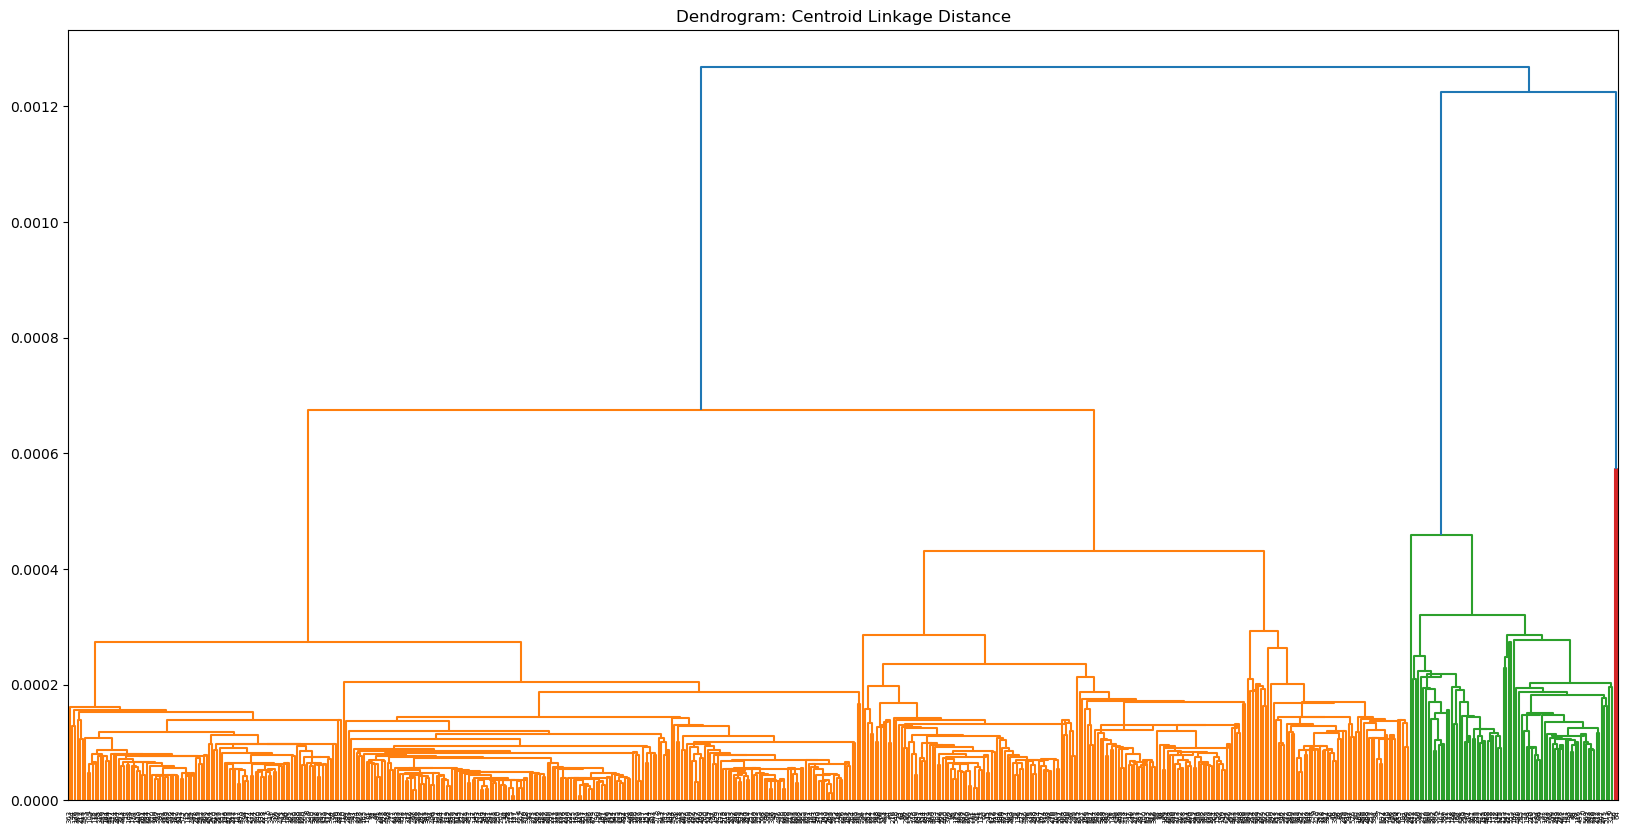

In [197]:
#plot dendrogram with centroid method
plt.figure(figsize=(20,10))
plt.title("Dendrogram: Centroid Linkage Distance")
dgnbc = hc.dendrogram(clstr1)
plt.show()

In [156]:
#max
max(clstr1[:,2])

0.00239184231686159

In [157]:
#70% of max
0.7*max(clstr1[:,2])

0.0016742896218031127

In [158]:
#check to see if it matches max
clstr1[-20:,2]

array([0.00026763, 0.00027272, 0.00027378, 0.00027588, 0.00027659,
       0.00027741, 0.00028486, 0.00029304, 0.00030728, 0.0003163 ,
       0.00033216, 0.00039241, 0.00044429, 0.00045073, 0.00049152,
       0.00051525, 0.00069989, 0.00093981, 0.0012444 , 0.00239184])

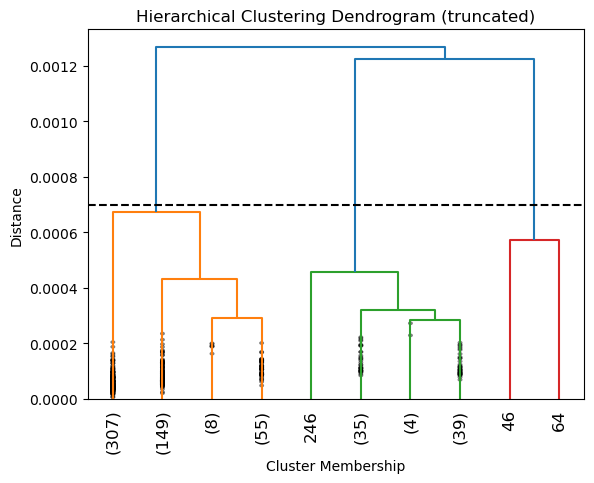

In [198]:
#truncated dendrogram with centroid method
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Membership')
plt.ylabel('Distance')
hc.dendrogram(clstr1, truncate_mode='lastp', p=10, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.0007, color='black', linestyle='--')
plt.show()

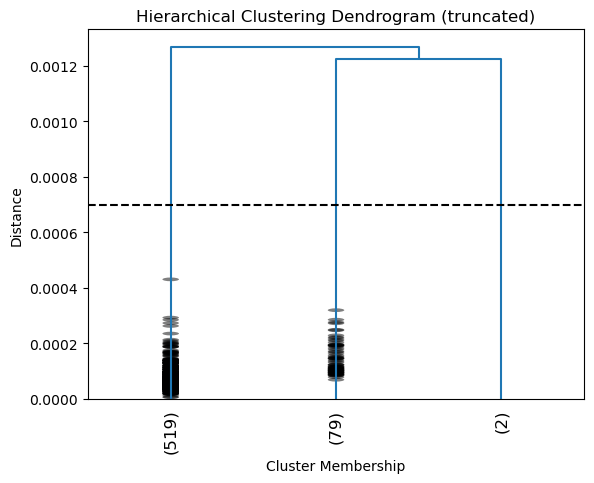

In [199]:
#truncated dendrogram with centroid method
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Membership')
plt.ylabel('Distance')
hc.dendrogram(clstr1, truncate_mode='lastp', p=3, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.0007, color='black', linestyle='--')
plt.show()

In [200]:
maxdist = 0.0007
clusters = fcluster(clstr1, maxdist, criterion='distance')
clusters

array([2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

In [202]:
Clstr1bc = bcf3.copy()
bcf3['CLUSTER'] = clusters.tolist()
bcf3

,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep,CLUSTER
0,1.0,0.0,0.0,0.0,48,1,17546.00,0,1,0,0,0,0,1,2
1,0.0,1.0,0.0,0.0,40,0,30085.10,1,3,1,0,1,1,0,1
2,1.0,0.0,0.0,0.0,51,1,16575.40,1,0,1,1,1,0,0,2
3,0.0,1.0,0.0,0.0,23,1,20375.40,1,3,0,0,1,0,0,1
4,0.0,0.0,1.0,0.0,57,1,50576.30,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.0,0.0,0.0,0.0,61,1,47025.00,0,2,1,1,1,1,0,1
596,1.0,0.0,0.0,0.0,30,1,9672.25,1,0,1,1,1,0,0,2
597,0.0,1.0,0.0,0.0,31,1,15976.30,1,0,1,1,0,0,1,1
598,1.0,0.0,0.0,0.0,29,0,14711.80,1,0,0,1,0,1,0,1


In [203]:
#see difference across clusters in the variables 
nbcAvg = bcf3.groupby('CLUSTER', as_index=False).mean()
nbcAvg

,CLUSTER,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,1,0.439306,0.290944,0.167630,0.102119,42.277457,0.493256,29388.944297,0.66474,1.015414,0.508671,0.709056,0.766859,0.348748,0.470135
1,2,0.506329,0.265823,0.113924,0.113924,43.341772,0.544304,15737.449747,0.64557,1.000000,0.379747,0.556962,0.696203,0.341772,0.367089
2,3,0.500000,0.500000,0.000000,0.000000,35.500000,0.500000,9149.055000,0.00000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000


In [204]:
#QUESTION #2 SINGLE
clstr2 = hc.linkage(nbc, method='single', metric="euclidean")
clstr2[0]

array([1.15000000e+02, 1.27000000e+02, 6.50256463e-06, 2.00000000e+00])

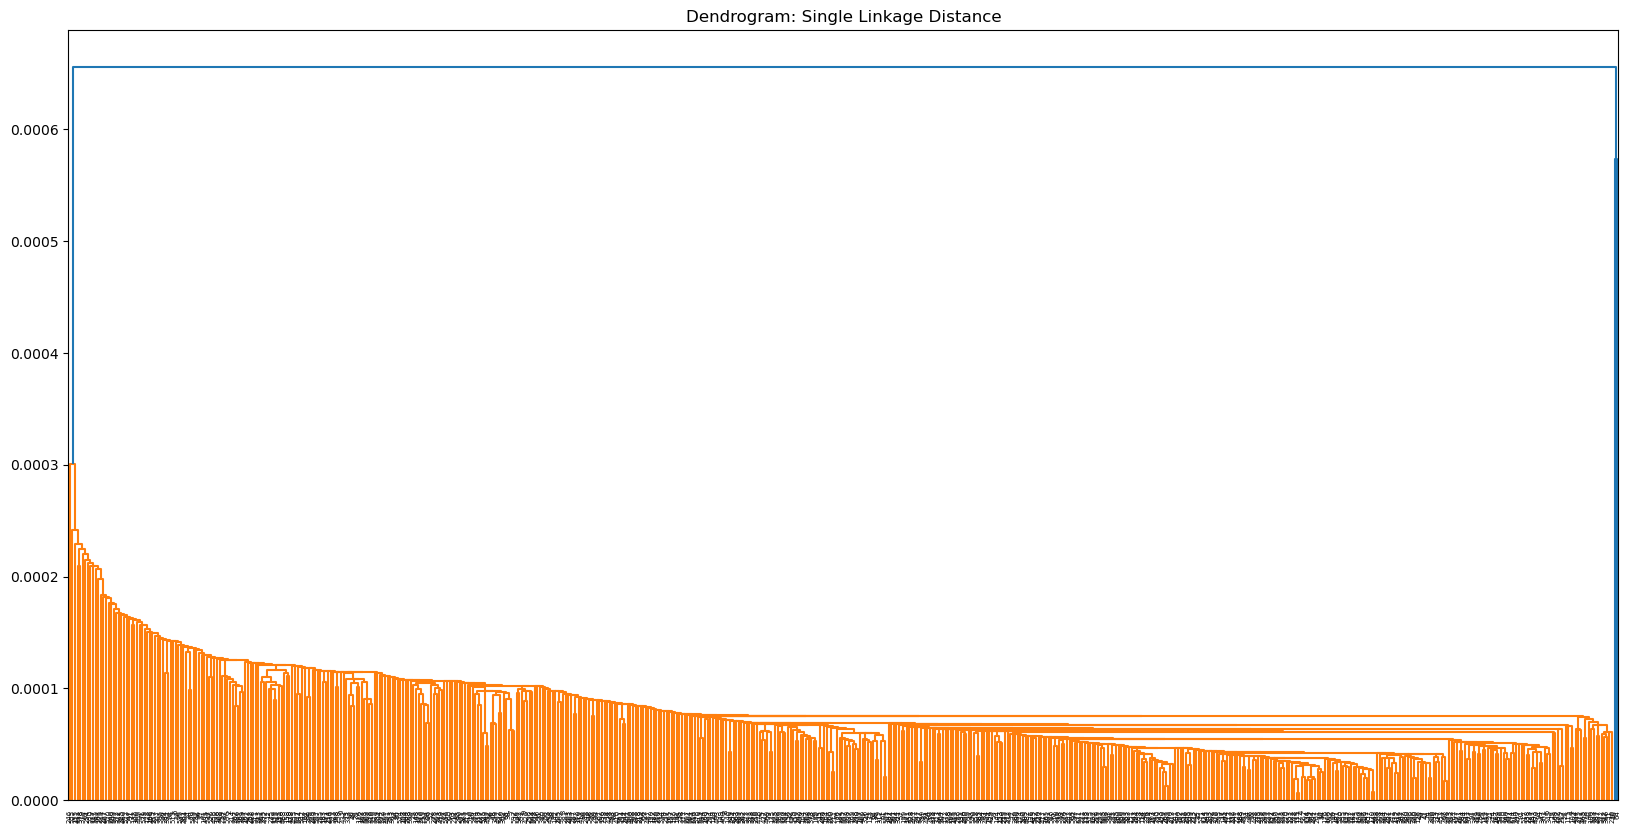

In [205]:
#plot dendrogram with single method
plt.figure(figsize=(20,10))
plt.title("Dendrogram: Single Linkage Distance")
dgnbc = hc.dendrogram(clstr2)
plt.show()

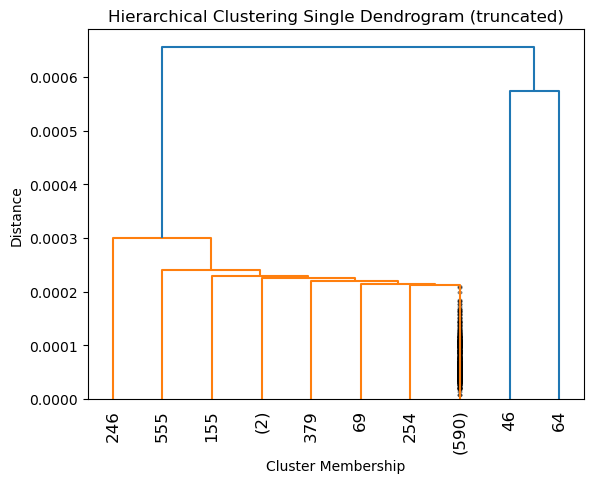

In [206]:
#plot truncated dendrogram with single method
plt.title('Hierarchical Clustering Single Dendrogram (truncated)')
plt.xlabel('Cluster Membership')
plt.ylabel('Distance')
hc.dendrogram(clstr2, truncate_mode='lastp', p=10, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.0007, color='black', linestyle='--')
plt.show()

In [207]:
#QUESTION #2 COMPLETE
clstr3 = hc.linkage(nbc, method='complete', metric="euclidean")
clstr3[0]

array([1.15000000e+02, 1.27000000e+02, 6.50256463e-06, 2.00000000e+00])

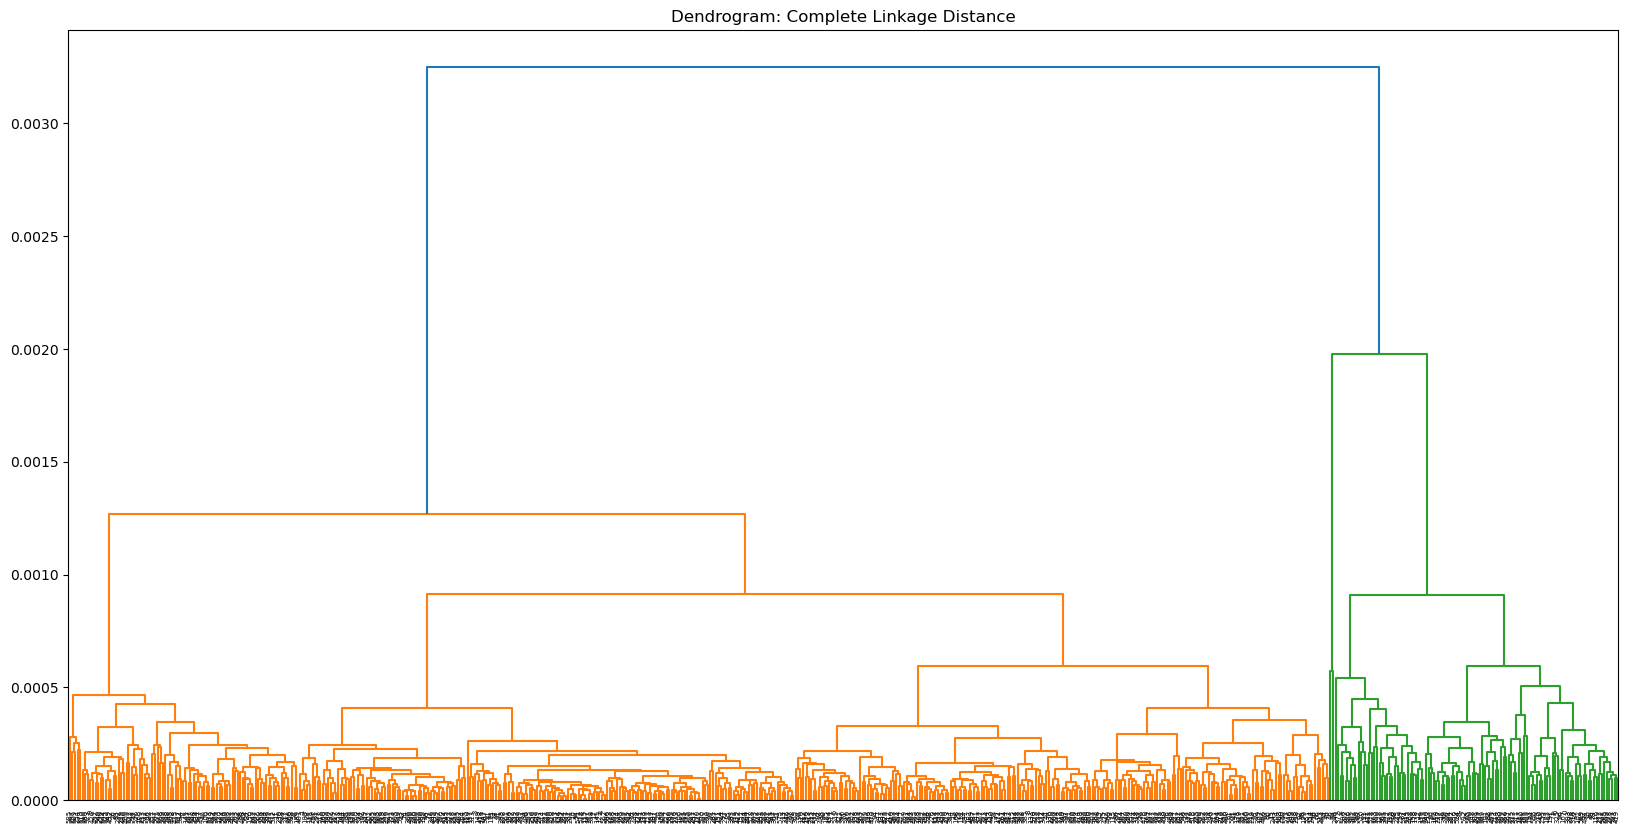

In [208]:
#plot dendrogram with complete method
plt.figure(figsize=(20,10))
plt.title("Dendrogram: Complete Linkage Distance")
dgnbc3 = hc.dendrogram(clstr3)
plt.show()

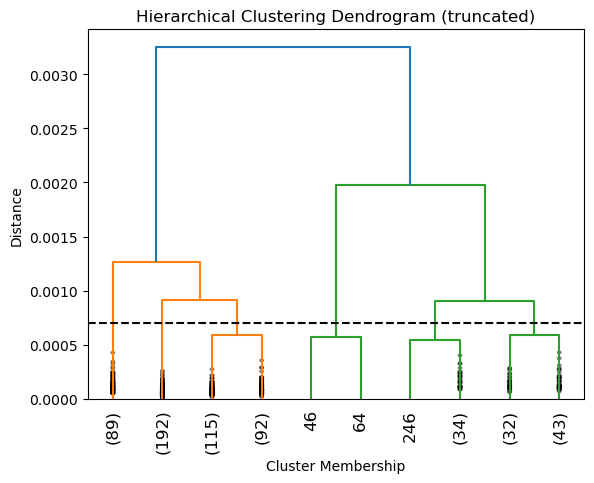

In [209]:
#plot truncated dendrogram with complete method
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Membership')
plt.ylabel('Distance')
hc.dendrogram(clstr3, truncate_mode='lastp', p=10, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.0007, color='black', linestyle='--')
plt.show()

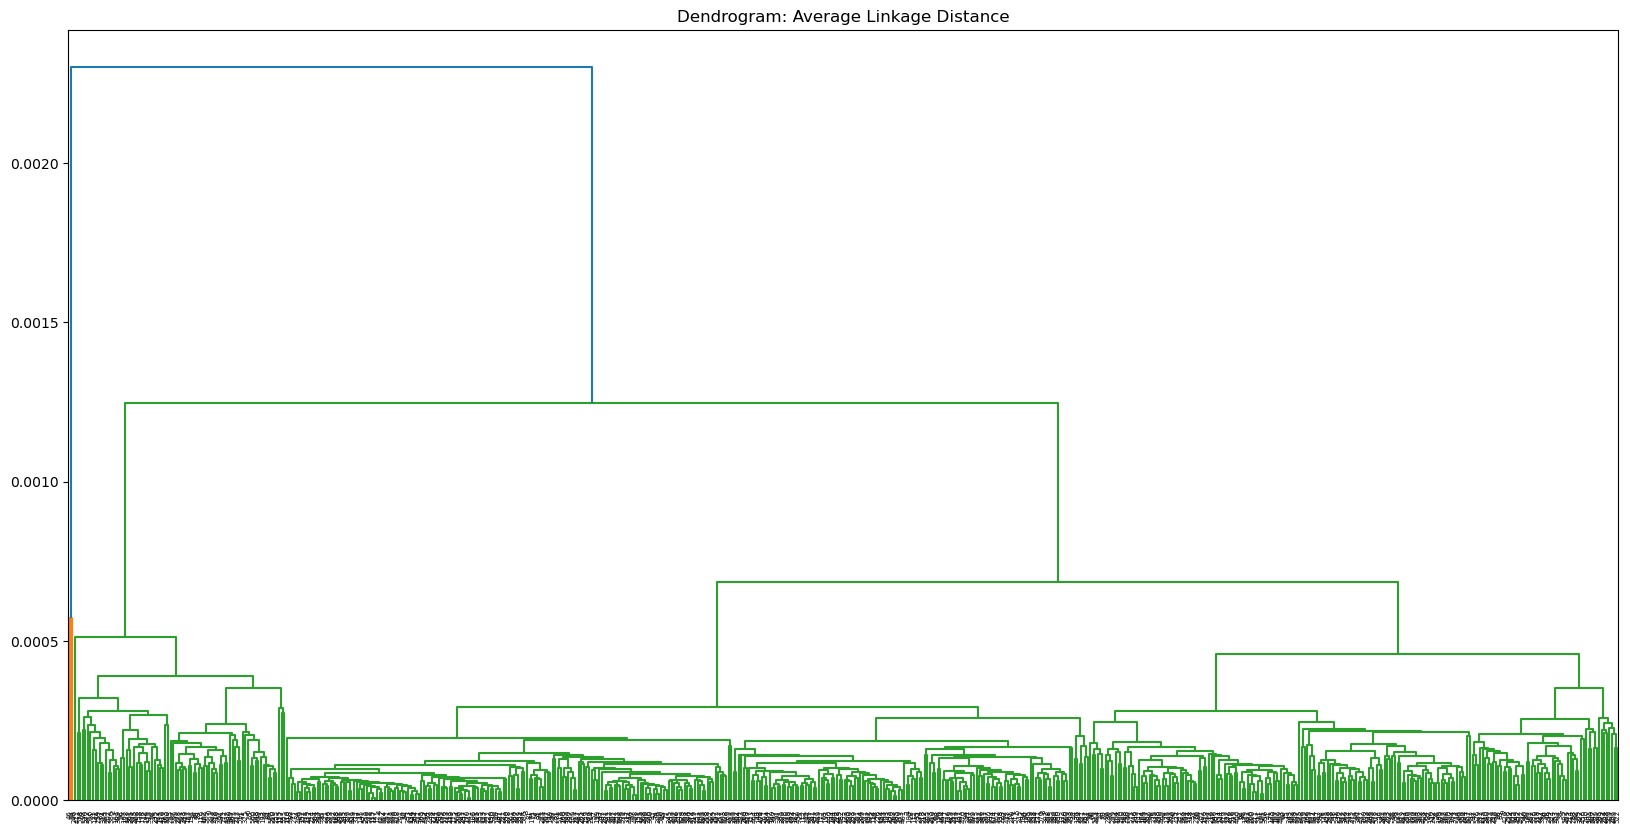

In [210]:
#QUESTION #2 AVERAGE
#plot dendrogram with average method
clstr4 = hc.linkage(nbc, method='average', metric="euclidean")
plt.figure(figsize=(20,10))
plt.title("Dendrogram: Average Linkage Distance")
dgnbc4 = hc.dendrogram(clstr4)
plt.show()

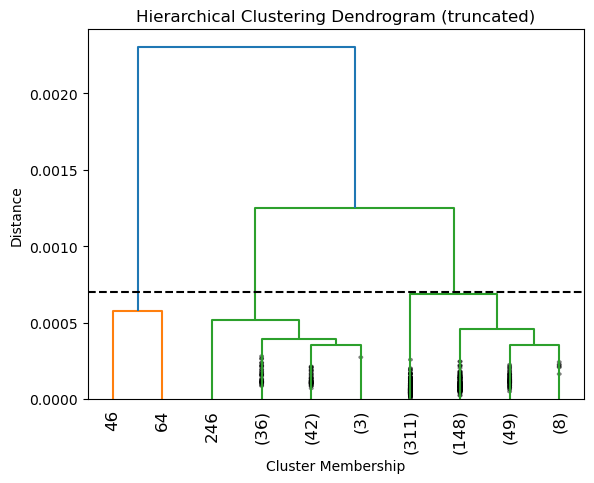

In [211]:
#plot truncated dendrogram with average method
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Membership')
plt.ylabel('Distance')
hc.dendrogram(clstr4, truncate_mode='lastp', p=10, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.0007, color='black', linestyle='--')
plt.show()

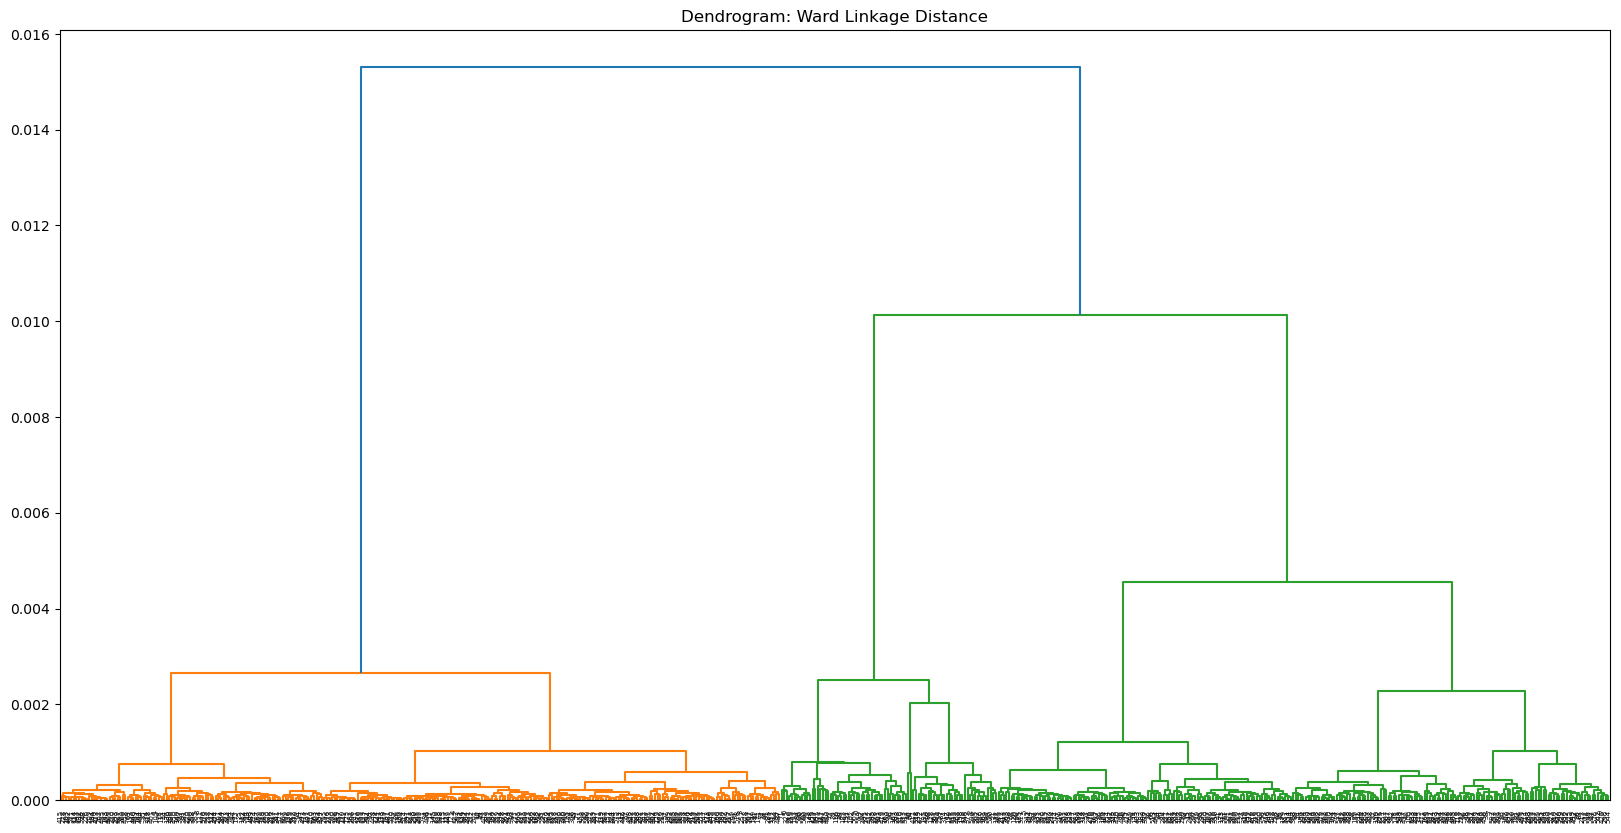

In [212]:
#QUESTION #2 WARD
#plot dendrogram with ward method
clstr5 = hc.linkage(nbc, method='ward', metric="euclidean")
plt.figure(figsize=(20,10))
plt.title("Dendrogram: Ward Linkage Distance")
dgnbc5 = hc.dendrogram(clstr5)
plt.show()

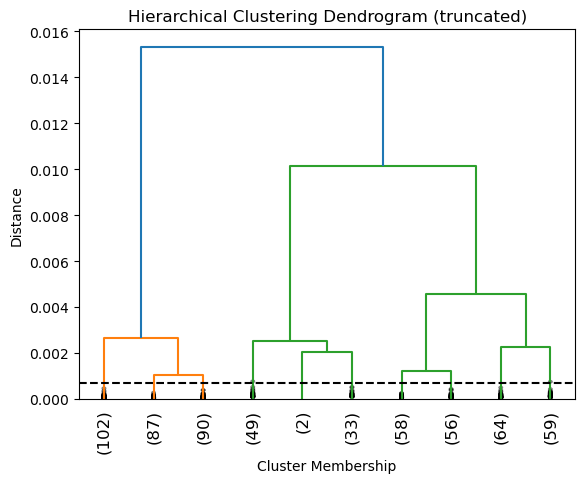

In [213]:
#plot truncated dendrogram with ward method
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Membership')
plt.ylabel('Distance')
hc.dendrogram(clstr5, truncate_mode='lastp', p=10, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.0007, color='black', linestyle='--')
plt.show()

In [214]:
#QUESTION #3 K MEANS CLUSTERING
#K means clustering (2 clusters)
clustr2 = km(n_clusters=2, random_state=0) 
clustr2.fit(nbc)
print(clustr2.cluster_centers_)
clusters2 = clustr2.labels_
print(clusters2)
bcf3['CLUSTER'] = clusters2.tolist()
print(bcf3['CLUSTER'].value_counts())
nbc2Avg = bcf3.groupby('CLUSTER', as_index=False).mean()
nbc2Avg

[[3.17461070e-05 2.06841914e-05 8.27724119e-06 5.85380526e-06
  2.43330381e-03 3.39653653e-05 9.99996946e-01 4.14794237e-05
  6.71707302e-05 2.99276465e-05 4.02252627e-05 4.82877064e-05
  2.31249596e-05 2.37899662e-05]
 [1.69322608e-05 1.00372206e-05 6.22391377e-06 4.05574037e-06
  1.38562106e-03 1.76853891e-05 9.99999002e-01 2.50040429e-05
  3.70169626e-05 1.81433671e-05 2.53768348e-05 2.92608318e-05
  1.30843483e-05 1.62578757e-05]]
[0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0
 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1

,CLUSTER,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,0,0.478022,0.318681,0.115385,0.087912,41.587912,0.538462,17422.635824,0.648352,1.000000,0.461538,0.615385,0.714286,0.351648,0.401099
1,1,0.435407,0.275120,0.179426,0.110048,42.746411,0.483254,31922.246435,0.665072,1.016746,0.507177,0.722488,0.777512,0.346890,0.480861


In [215]:
#QUESTION #3 K MEANS CLUSTERING
#K means clustering (3 clusters)
clustr3 = km(n_clusters=3, random_state=0) 
clustr3.fit(nbc)
print(clustr3.cluster_centers_)
clusters3 = clustr3.labels_
print(clusters3)
bcf3['CLUSTER'] = clusters3.tolist()
print(bcf3['CLUSTER'].value_counts())
nbc3Avg = bcf3.groupby('CLUSTER', as_index=False).mean()
nbc3Avg

[[3.70500112e-05 2.04255771e-05 7.87949310e-06 7.14605512e-06
  2.70123816e-03 3.88049765e-05 9.99996288e-01 4.58003718e-05
  6.62768509e-05 3.04893852e-05 4.31672557e-05 5.31437487e-05
  2.25397630e-05 2.35022862e-05]
 [1.48029209e-05 8.95077429e-06 6.35030333e-06 3.40123218e-06
  1.25692065e-03 1.60586464e-05 9.99999194e-01 2.25785592e-05
  3.41329598e-05 1.67173758e-05 2.38881089e-05 2.62678283e-05
  1.17789148e-05 1.58287402e-05]
 [2.35861303e-05 1.63382714e-05 7.08488597e-06 5.14986252e-06
  1.87961634e-03 2.43834241e-05 9.99998204e-01 3.33655486e-05
  5.46378417e-05 2.50139084e-05 3.23040778e-05 3.93027358e-05
  1.96705716e-05 2.02217189e-05]]
[0 1 0 1 1 1 0 0 1 2 1 2 0 1 2 2 2 1 0 1 1 0 1 2 2 1 2 2 1 0 0 1 2 1 1 1 2
 0 0 0 2 2 1 1 1 1 0 2 1 0 2 1 0 2 1 1 0 1 2 1 2 2 2 2 0 0 2 1 1 0 2 0 1 0
 1 2 2 1 2 2 2 1 0 2 0 1 2 0 2 2 1 1 1 1 1 2 0 1 0 1 2 0 0 1 2 1 1 2 2 1 1
 1 1 1 1 1 0 0 2 1 1 1 2 1 1 1 1 1 0 1 2 1 0 2 1 2 1 1 1 1 1 2 2 1 1 1 2 1
 0 1 2 1 1 1 2 0 2 1 0 0 1 0 0 0 2 1 2 0 1

,CLUSTER,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,0,0.490385,0.288462,0.115385,0.105769,42.461538,0.557692,15886.923365,0.673077,0.913462,0.413462,0.615385,0.711538,0.307692,0.355769
1,1,0.429967,0.270358,0.198697,0.100977,43.000000,0.482085,34726.298046,0.664495,1.032573,0.511401,0.768730,0.781759,0.348534,0.508143
2,2,0.455026,0.317460,0.121693,0.105820,41.375661,0.497354,22228.598942,0.645503,1.031746,0.507937,0.603175,0.746032,0.370370,0.428571


In [216]:
#QUESTION #3 K MEANS CLUSTERING
#K means clustering (4 clusters)
clustr4 = km(n_clusters=4, random_state=0) 
clustr4.fit(nbc)
print(clustr4.cluster_centers_)
clusters7 = clustr4.labels_
print(clusters4)
bcf3['CLUSTER'] = clusters7.tolist()
print(bcf3['CLUSTER'].value_counts())
nbc4Avg = bcf3.groupby('CLUSTER', as_index=False).mean()
nbc4Avg

[[1.40700848e-05 8.67432391e-06 5.96955489e-06 3.21229402e-06
  1.20348038e-03 1.48040826e-05 9.99999266e-01 2.08181539e-05
  3.25116788e-05 1.62841535e-05 2.30022167e-05 2.52937057e-05
  1.10243063e-05 1.68899260e-05]
 [2.49365619e-05 1.92715926e-05 8.94564262e-06 7.54208325e-06
  2.13355557e-03 3.14456133e-05 9.99997696e-01 4.11823291e-05
  6.62014440e-05 3.13337183e-05 4.09088799e-05 4.52425118e-05
  2.07907444e-05 2.33381739e-05]
 [2.16675211e-05 1.24354430e-05 6.20425056e-06 4.67901997e-06
  1.64913300e-03 2.15172802e-05 9.99998623e-01 3.11507632e-05
  4.34889363e-05 1.99820313e-05 2.88961752e-05 3.46735171e-05
  1.61815267e-05 1.48184475e-05]
 [3.94050719e-05 2.13062130e-05 8.07902384e-06 4.81510478e-06
  2.80946987e-03 3.75914630e-05 9.99996000e-01 4.14068433e-05
  6.74910250e-05 2.93494693e-05 3.86041136e-05 5.26327755e-05
  2.58092961e-05 2.49006920e-05]]
[3 0 3 0 0 2 3 1 2 1 0 1 3 0 2 2 1 0 1 0 0 3 0 2 2 0 1 1 0 3 3 0 1 0 0 0 2
 3 1 3 1 2 0 0 2 0 3 1 0 3 2 2 3 2 0 0 1 0 1 0 2

,CLUSTER,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,0,0.432000,0.272000,0.192000,0.104000,43.168000,0.468000,36181.746400,0.644000,1.040000,0.524000,0.784000,0.792000,0.348000,0.556000
1,1,0.435185,0.333333,0.129630,0.101852,40.157407,0.537037,18916.520463,0.675926,1.037037,0.537037,0.657407,0.740741,0.351852,0.435185
2,2,0.447853,0.288344,0.153374,0.110429,42.055215,0.503067,25655.840552,0.693252,0.975460,0.466258,0.631902,0.748466,0.343558,0.361963
3,3,0.518987,0.278481,0.113924,0.088608,43.708861,0.544304,15748.049494,0.620253,0.962025,0.392405,0.556962,0.696203,0.354430,0.367089


In [217]:
#QUESTION #3 K MEANS CLUSTERING
#K means clustering (5 clusters)
clustr5 = km(n_clusters=5, random_state=0) 
clustr5.fit(nbc)
print(clustr5.cluster_centers_)
clusters5 = clustr5.labels_
print(clusters5)
bcf3['CLUSTER'] = clusters5.tolist()
print(bcf3['CLUSTER'].value_counts())
nbc5Avg = bcf3.groupby('CLUSTER', as_index=False).mean()
nbc5Avg

[[4.06158959e-05 2.19102932e-05 6.72764747e-06 5.28323997e-06
  2.83832283e-03 3.85808069e-05 9.99995919e-01 4.28075139e-05
  7.22829476e-05 3.07806897e-05 4.17585697e-05 5.32909480e-05
  2.62658001e-05 2.16958953e-05]
 [2.42122399e-05 1.46811910e-05 7.27540080e-06 4.16197311e-06
  1.82715879e-03 2.28218673e-05 9.99998314e-01 3.23122721e-05
  4.90625358e-05 2.58321140e-05 3.15446769e-05 4.03062555e-05
  1.81236665e-05 1.87952038e-05]
 [2.49406491e-05 2.09198122e-05 9.03659475e-06 8.68031169e-06
  2.26291374e-03 3.23048335e-05 9.99997415e-01 4.31878309e-05
  6.48765588e-05 2.76154140e-05 4.24350736e-05 4.34994608e-05
  1.90446818e-05 2.64715753e-05]
 [1.35483721e-05 8.43822284e-06 5.46181251e-06 3.47736549e-06
  1.15451886e-03 1.50547138e-05 9.99999327e-01 2.05705250e-05
  3.06530602e-05 1.56824776e-05 2.17367921e-05 2.48329379e-05
  1.08197140e-05 1.61332735e-05]
 [1.77675421e-05 9.95245037e-06 7.26294615e-06 4.00775052e-06
  1.45071563e-03 1.93271408e-05 9.99998937e-01 2.70960256e-05


,CLUSTER,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,0,0.513889,0.291667,0.097222,0.097222,43.430556,0.555556,15477.599028,0.625000,1.013889,0.402778,0.597222,0.708333,0.347222,0.319444
1,1,0.484375,0.304688,0.125000,0.085938,42.085938,0.468750,23129.204219,0.656250,0.992188,0.554688,0.601562,0.773438,0.351562,0.406250
2,2,0.405405,0.351351,0.135135,0.108108,40.378378,0.540541,17855.437297,0.675676,0.959459,0.432432,0.648649,0.662162,0.310811,0.459459
3,3,0.418848,0.272251,0.188482,0.120419,43.167539,0.486911,37570.416230,0.643979,1.010471,0.518325,0.785340,0.795812,0.356021,0.554974
4,4,0.444444,0.259259,0.200000,0.096296,42.148148,0.496296,29201.789630,0.696296,1.059259,0.481481,0.711111,0.770370,0.355556,0.437037


In [218]:
#QUESTION #3 K MEANS CLUSTERING
#K means clustering (6 clusters)
clustr6 = km(n_clusters=6, random_state=0) 
clustr6.fit(nbc)
print(clustr6.cluster_centers_)
clusters6 = clustr6.labels_
print(clusters6)
bcf3['CLUSTER'] = clusters6.tolist()
print(bcf3['CLUSTER'].value_counts())
nbc6Avg = bcf3.groupby('CLUSTER', as_index=False).mean()
nbc6Avg

[[4.04623941e-05 2.03254710e-05 6.63548791e-06 5.21086682e-06
  2.79468201e-03 3.90594392e-05 9.99996061e-01 4.36552031e-05
  7.02615571e-05 2.74388859e-05 3.74233837e-05 5.10880410e-05
  2.46081506e-05 2.32488280e-05]
 [2.30250468e-05 1.51547778e-05 7.51009115e-06 4.29623031e-06
  1.82051156e-03 2.19398725e-05 9.99998327e-01 3.16430732e-05
  4.79471294e-05 2.55109636e-05 3.19554953e-05 4.02449760e-05
  1.84515980e-05 1.91447978e-05]
 [2.64664015e-05 1.92322185e-05 8.91610682e-06 8.56457420e-06
  2.23978636e-03 3.25655064e-05 9.99997467e-01 4.40458721e-05
  6.84723451e-05 2.83353696e-05 4.28724357e-05 4.29412671e-05
  1.78193170e-05 2.37385224e-05]
 [1.35483721e-05 8.43822284e-06 5.46181251e-06 3.47736549e-06
  1.15451886e-03 1.50547138e-05 9.99999327e-01 2.05705250e-05
  3.06530602e-05 1.56824776e-05 2.17367921e-05 2.48329379e-05
  1.08197140e-05 1.61332735e-05]
 [1.77675421e-05 9.95245037e-06 7.26294615e-06 4.00775052e-06
  1.45071563e-03 1.93271408e-05 9.99998937e-01 2.70960256e-05


,CLUSTER,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,0,0.520548,0.287671,0.095890,0.095890,43.561644,0.561644,15684.644247,0.643836,0.986301,0.383562,0.561644,0.698630,0.356164,0.342466
1,1,0.467742,0.314516,0.129032,0.088710,42.145161,0.459677,23237.499355,0.653226,0.991935,0.548387,0.604839,0.782258,0.354839,0.411290
2,2,0.426667,0.333333,0.133333,0.106667,40.333333,0.546667,18020.007600,0.680000,1.000000,0.453333,0.666667,0.653333,0.293333,0.426667
3,3,0.418848,0.272251,0.188482,0.120419,43.167539,0.486911,37570.416230,0.643979,1.010471,0.518325,0.785340,0.795812,0.356021,0.554974
4,4,0.444444,0.259259,0.200000,0.096296,42.148148,0.496296,29201.789630,0.696296,1.059259,0.481481,0.711111,0.770370,0.355556,0.437037
5,5,0.500000,0.500000,0.000000,0.000000,35.500000,0.500000,9149.055000,0.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000


In [219]:
#QUESTION #3 K MEANS CLUSTERING
#K means clustering (7 clusters)
clustr7 = km(n_clusters=7, random_state=0) 
clustr7.fit(nbc)
print(clustr7.cluster_centers_)
clusters7 = clustr7.labels_
print(clusters7)
bcf3['CLUSTER'] = clusters7.tolist()
print(bcf3['CLUSTER'].value_counts())
nbc7Avg = bcf3.groupby('CLUSTER', as_index=False).mean()
nbc7Avg

[[4.06934887e-05 1.99726039e-05 7.02015388e-06 5.51294606e-06
  2.80944799e-03 3.85699176e-05 9.99996020e-01 4.46687101e-05
  7.43346908e-05 2.75403540e-05 3.95928552e-05 5.10293192e-05
  2.45174807e-05 2.09508793e-05]
 [2.56652583e-05 1.23295021e-05 5.33180429e-06 4.35445007e-06
  1.69669816e-03 2.30181379e-05 9.99998548e-01 3.07520944e-05
  4.79145422e-05 2.12994039e-05 3.01594382e-05 3.71862966e-05
  1.66334258e-05 1.73191959e-05]
 [2.05018976e-05 2.01309217e-05 9.64942688e-06 6.34096834e-06
  1.97143773e-03 2.46397839e-05 9.99998039e-01 3.81125644e-05
  6.47880805e-05 2.78329318e-05 3.42136652e-05 4.41230686e-05
  2.28289539e-05 1.99543991e-05]
 [1.30070324e-05 8.83507602e-06 5.82796754e-06 3.11811736e-06
  1.14541246e-03 1.50125419e-05 9.99999338e-01 2.06860204e-05
  3.15666019e-05 1.52859640e-05 2.14947960e-05 2.50610921e-05
  1.04123437e-05 1.60378533e-05]
 [1.66843786e-05 9.22513374e-06 7.15137660e-06 3.69992756e-06
  1.40585505e-03 1.70898302e-05 9.99999004e-01 2.43646672e-05


,CLUSTER,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,0,0.507246,0.289855,0.101449,0.101449,43.391304,0.550725,15533.713333,0.652174,1.043478,0.376812,0.594203,0.695652,0.347826,0.304348
1,1,0.489362,0.276596,0.117021,0.117021,40.968085,0.500000,24163.803298,0.638298,0.968085,0.478723,0.606383,0.755319,0.351064,0.414894
2,2,0.415584,0.350649,0.129870,0.103896,40.441558,0.467532,20599.798571,0.701299,1.129870,0.532468,0.597403,0.779221,0.389610,0.376623
3,3,0.402235,0.284916,0.201117,0.111732,43.044693,0.486034,37752.489385,0.648045,1.033520,0.502793,0.782123,0.804469,0.340782,0.558659
4,4,0.467213,0.254098,0.196721,0.081967,43.278689,0.475410,30856.069672,0.680328,1.032787,0.532787,0.737705,0.754098,0.352459,0.450820
5,5,0.500000,0.500000,0.000000,0.000000,35.500000,0.500000,9149.055000,0.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000
6,6,0.456140,0.298246,0.140351,0.105263,42.491228,0.578947,18325.900000,0.666667,0.789474,0.473684,0.666667,0.666667,0.298246,0.508772


In [220]:
#QUESTION #3 K MEANS CLUSTERING
#K means clustering (8 clusters)
clustr8 = km(n_clusters=8, random_state=0) 
clustr8.fit(nbc)
print(clustr8.cluster_centers_)
clusters8 = clustr8.labels_
print(clusters8)
bcf3['CLUSTER'] = clusters8.tolist()
print(bcf3['CLUSTER'].value_counts())
nbc8Avg = bcf3.groupby('CLUSTER', as_index=False).mean()
nbc8Avg

[[2.82211162e-05 2.30947597e-05 9.90600373e-06 5.53015882e-06
  2.65170211e-03 3.19841433e-05 9.99996464e-01 3.97818029e-05
  6.99878301e-05 2.35756681e-05 3.28441410e-05 4.87582555e-05
  2.74160675e-05 2.63485650e-05]
 [1.69922946e-05 9.40652499e-06 7.30916881e-06 3.45023210e-06
  1.41714580e-03 1.72061777e-05 9.99998987e-01 2.49611193e-05
  3.89386849e-05 1.84423663e-05 2.72103443e-05 2.77794079e-05
  1.32509992e-05 1.55906927e-05]
 [2.53612563e-05 1.27048910e-05 5.31046154e-06 4.25766132e-06
  1.70634244e-03 2.27943729e-05 9.99998533e-01 2.99359801e-05
  4.71438731e-05 2.16772343e-05 2.89180407e-05 3.74632835e-05
  1.59378849e-05 1.78456446e-05]
 [1.33194109e-05 8.64195961e-06 5.70058027e-06 3.36803005e-06
  1.14835278e-03 1.52810841e-05 9.99999334e-01 2.09641469e-05
  3.08766215e-05 1.55485298e-05 2.16369768e-05 2.52435886e-05
  1.07814367e-05 1.59900402e-05]
 [5.61145412e-05 1.35935625e-05 5.88924876e-06 4.06470878e-06
  2.96831724e-03 4.59089170e-05 9.99995569e-01 4.64896027e-05


,CLUSTER,inner city,town,rural,suburban,age,sex,income,married,children,car,savings,checking,mortgage,pep
0,0,0.434783,0.304348,0.152174,0.108696,45.478261,0.521739,17185.718261,0.630435,1.043478,0.369565,0.543478,0.717391,0.434783,0.413043
1,1,0.459677,0.258065,0.201613,0.080645,43.137097,0.467742,30552.487097,0.685484,1.064516,0.516129,0.750000,0.750000,0.346774,0.443548
2,2,0.488636,0.284091,0.113636,0.113636,41.306818,0.500000,24233.637614,0.625000,0.965909,0.488636,0.579545,0.761364,0.340909,0.431818
3,3,0.409836,0.278689,0.196721,0.114754,42.907104,0.491803,37554.454098,0.650273,1.010929,0.508197,0.781421,0.803279,0.349727,0.551913
4,4,0.645161,0.225806,0.064516,0.064516,41.612903,0.580645,14040.476129,0.645161,0.870968,0.387097,0.548387,0.645161,0.225806,0.290323
5,5,0.407895,0.355263,0.131579,0.105263,40.513158,0.473684,20655.132763,0.697368,1.131579,0.539474,0.592105,0.776316,0.394737,0.368421
6,6,0.500000,0.500000,0.000000,0.000000,35.500000,0.500000,9149.055000,0.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000
7,7,0.440000,0.320000,0.120000,0.120000,41.380000,0.580000,18139.982400,0.700000,0.860000,0.480000,0.760000,0.680000,0.280000,0.460000
